In [3]:
directory = 'Indian Food'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
directory, 
target_size=(256,256), 
color_mode='rgb', 
batch_size=32, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)

validation_generator = train_datagen.flow_from_directory(
directory,
target_size=(256,256), 
color_mode='rgb', 
batch_size=32,
class_mode='categorical', 
subset='validation', 
shuffle=False
)

Found 3821 images belonging to 15 classes.
Found 949 images belonging to 15 classes.


In [5]:
class_names = list(train_generator.class_indices.keys())
class_labels = train_generator.class_indices

print("Class names:", class_names)
print("Class labels:", class_labels)

Class names: ['Briyani', 'Chole-Bhature', 'Frankie', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'dabeli', 'dal', 'dhokla', 'dosa', 'pakora']
Class labels: {'Briyani': 0, 'Chole-Bhature': 1, 'Frankie': 2, 'Jalebi': 3, 'Kofta': 4, 'Naan': 5, 'Paneer-Tikka': 6, 'Pani-Puri': 7, 'Pav-Bhaji': 8, 'Vadapav': 9, 'dabeli': 10, 'dal': 11, 'dhokla': 12, 'dosa': 13, 'pakora': 14}


In [6]:
X_train, y_train = [], []
for _ in range(119):
    X_batch, y_batch = next(train_generator)
    X_train.extend(X_batch)
    y_train.extend(y_batch)


X_val, y_val = [], []
for _ in range(29):  # num_samples is the number of samples you want to collect
    X_batch, y_batch = next(validation_generator)
    X_val.extend(X_batch)
    y_val.extend(y_batch)

c:\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [7]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [8]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (3808, 256, 256, 3)
Shape of y_train is  (3808, 15)
Shape of X_val is  (928, 256, 256, 3)
Shape of y_val is  (928, 15)


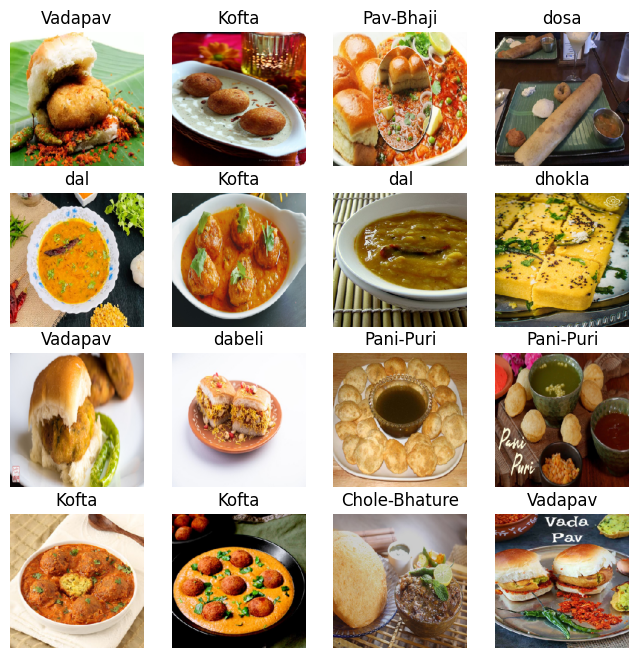

In [9]:
#visulaizing a few images from the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8)) # specifying the overall grid size

for i in range(16):
    plt.subplot(4,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')

plt.show()

In [10]:
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

model = Sequential()
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(15, activation="softmax"))

model.summary()

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,294,319 (16.38 MB)

 Trainable params: 4,294,319 (16.38 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(train_generator,
          steps_per_epoch= 30,
          epochs=25,
          validation_data=(validation_generator),
          validation_steps=10)

Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.1043 - loss: 2.7121 - val_accuracy: 0.2531 - val_loss: 2.5142
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1530 - loss: 2.6305 - val_accuracy: 0.2719 - val_loss: 2.4557
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1956 - loss: 2.4795 - val_accuracy: 0.1359 - val_loss: 2.5660
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.2501 - loss: 2.3298 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25


c:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2781 - val_loss: 2.2883
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2717 - loss: 2.2381 - val_accuracy: 0.3906 - val_loss: 2.0365
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2914 - loss: 2.2033 - val_accuracy: 0.1586 - val_loss: 2.5889
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.2942 - loss: 2.1406 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.2924 - loss: 2.1989 - val_accuracy: 0.2844 - val_loss: 2.1441
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4750 - val_loss: 1.8893
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.3698 - loss: 2.0077 - val_accuracy: 0.1812 - val_loss: 2.5228
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.3822 - loss: 1.9105 - val_accuracy

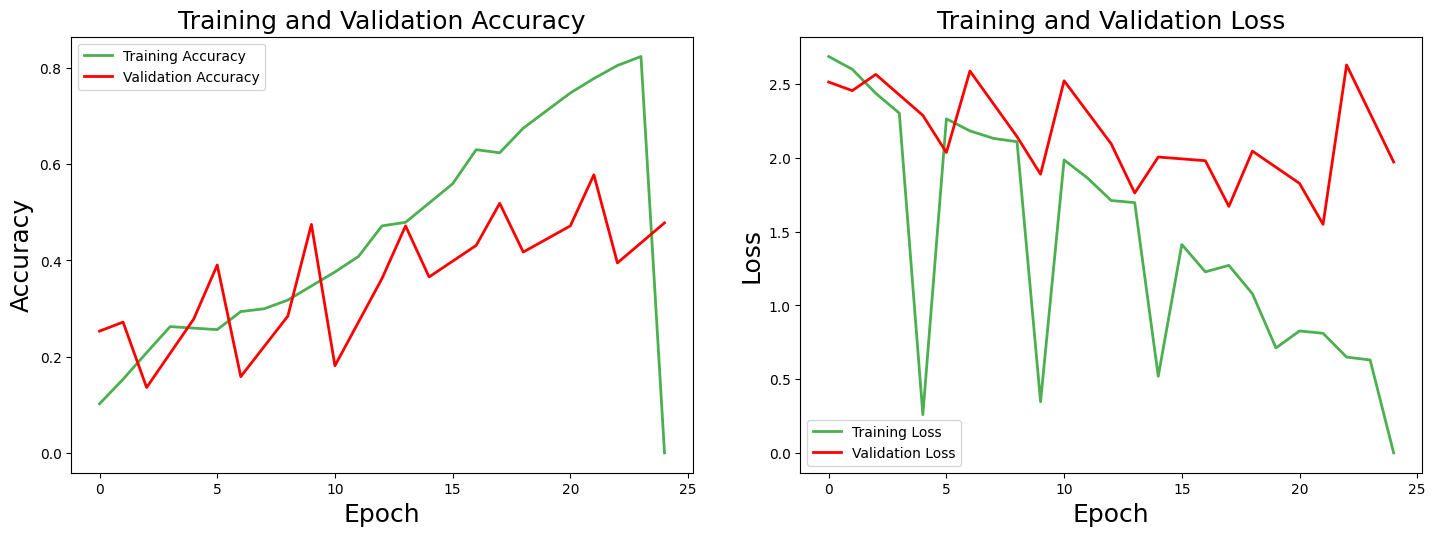

In [12]:
epochs_range = range(25)

acc = history.history['accuracy']
for i in range(1, len(acc)-1):
    if acc[i] == 0:
        acc[i] = (acc[i-1] + acc[i+1])/2

val_acc = history.history['val_accuracy']
for i in range(1, len(val_acc)-1):
    if val_acc[i] == 0 and i<len(acc):
        val_acc[i] = (val_acc[i-1] + val_acc[i+1])/2

loss = history.history['loss']
for i in range(1, len(loss)-1):
    if loss[i] == 0:
        loss[i] = (acc[i-1] + acc[i+1])/2

val_loss = history.history['val_loss']
for i in range(1, len(val_loss)-1):
    if val_loss[i] == 0:
        val_loss[i] = (val_loss[i-1] + val_loss[i+1])/2

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=2)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=2)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=2)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=2)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [19]:
loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 393ms/step - accuracy: 0.4736 - loss: 1.9360
Validation: accuracy = 0.491379  ;  loss = 2.033204


In [13]:
y_pred = model.predict(X_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 402ms/step


In [14]:
y_out = []
for _ in range(len(y_val)):
    result = np.zeros_like(y_val[0])
    result[np.argmax(y_pred[_])] = 1
    y_out.append(result)

y_out = np.array(y_out)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_out, target_names = class_names))

               precision    recall  f1-score   support

      Briyani       0.35      0.33      0.34        45
Chole-Bhature       0.42      0.20      0.27        65
      Frankie       0.30      0.51      0.38        68
       Jalebi       0.67      0.46      0.54        61
        Kofta       0.70      0.79      0.74       133
         Naan       0.66      0.71      0.68        70
 Paneer-Tikka       0.29      0.65      0.40        51
    Pani-Puri       0.19      0.17      0.18        35
    Pav-Bhaji       0.32      0.20      0.24        60
      Vadapav       0.82      0.92      0.86       107
       dabeli       0.43      0.14      0.21        44
          dal       0.43      0.40      0.42        52
       dhokla       0.37      0.47      0.41        49
         dosa       0.12      0.03      0.05        34
       pakora       0.31      0.19      0.23        54

    micro avg       0.49      0.49      0.49       928
    macro avg       0.42      0.41      0.40       928
 weighte

In [16]:
from sklearn.metrics import confusion_matrix
y_val1 = []
y_out1 = []
for _ in range(len(y_val)):
    y_val1.append(np.argmax(y_val[_]))
    y_out1.append(np.argmax(y_out[_]))
cf = confusion_matrix(y_val1, y_out1)

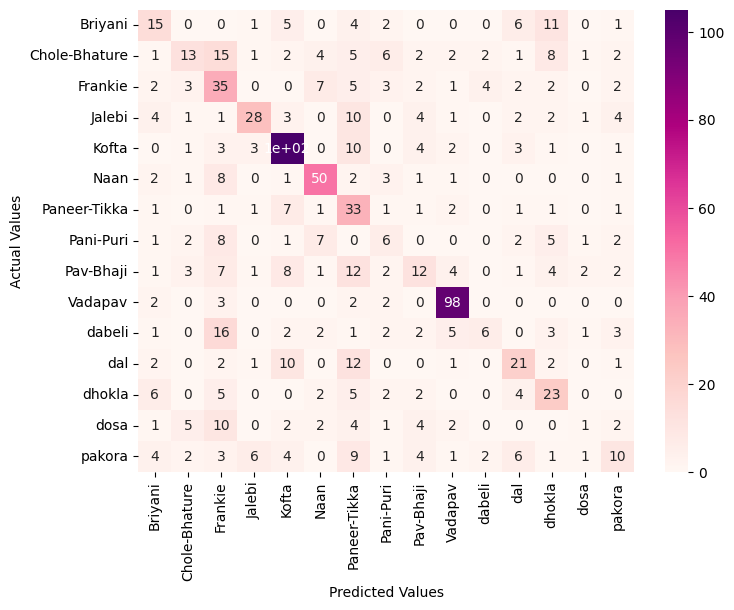

In [17]:
import seaborn as sns
import pandas as pd

cm_df = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot = True, cmap = 'RdPu')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()